<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import metrics
from sklearn.feature_selection import RFE

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
df_likes = pd.read_csv('D:/Engineering Documents/Great Learnig/PGP-DSE/DataSets/Likes.csv')

df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [3]:
# Shape of the Data
df_likes.shape

(2104, 15)

**There are 2104 data points and 15 columns**

In [4]:
# Data Type information 
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

**All DataTypes Looks Fine**

In [5]:
# Missing Value Check
df_likes.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

**There are two missing values in Gender Column which can be dropped**

In [6]:
df_likes.dropna(subset=['gender'],axis='index',inplace=True)

df_likes.shape

(2102, 15)

**Two rows have been dropped and updated data points is 2102**

In [7]:
df_likes.drop('userid',axis=1,inplace=True)

df_likes.shape

(2102, 14)

**Since userid is unique for all the users . It will not contribute to the model.Hence dropped**

In [8]:
df_likes.std()

# Checking Standard Deviation of all the Features for constant values

age                       16.152294
dob_day                    9.243655
dob_year                  16.152294
dob_month                  3.698093
tenure                   295.039197
friend_count               1.396896
friendships_initiated      1.242419
likes                    169.533819
likes_received            44.805840
mobile_likes             155.322967
mobile_likes_received     25.840426
www_likes                 53.771175
www_likes_received        22.137606
dtype: float64

**There are no features having  0 std**

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 

In [9]:
df_likes.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [10]:
df_eda = df_likes[['dob_day','tenure','age','dob_month','likes_received','dob_year','likes']]

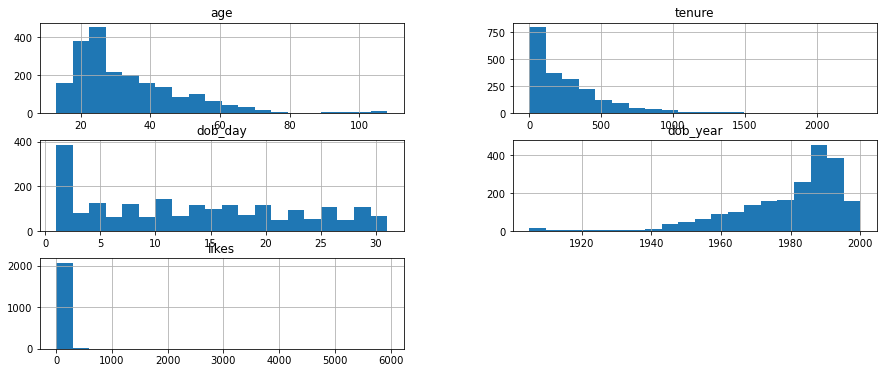

In [11]:
# Plotting Histogram Plot
df_eda[['age','tenure','dob_day','dob_year','likes']].hist(bins = 20,figsize=(15,6))
plt.show()

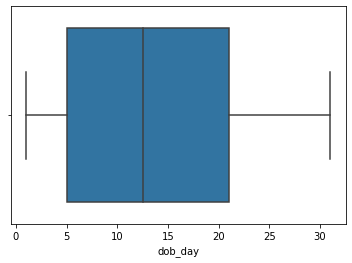

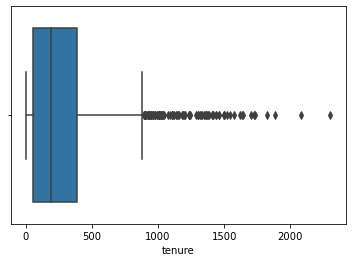

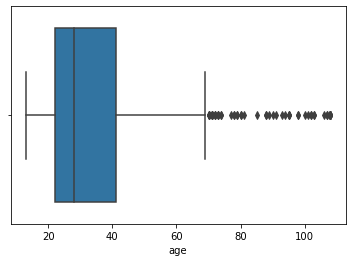

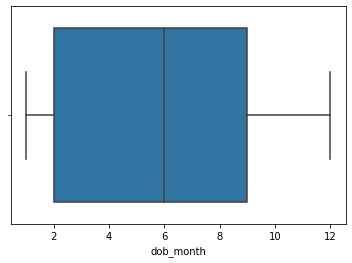

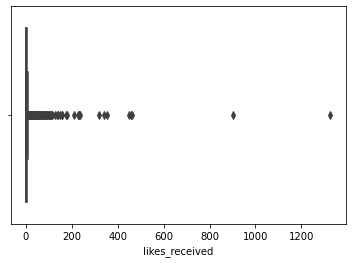

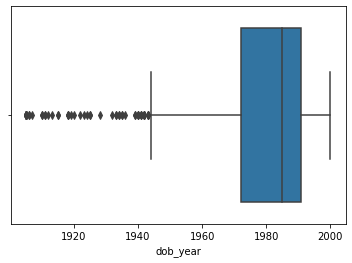

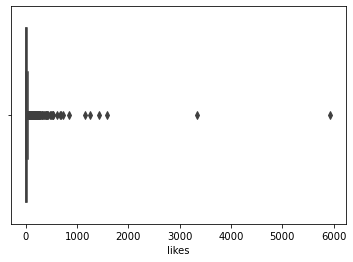

In [12]:
# Plotting Boxplot for the features
for col in df_eda.columns:
    sns.boxplot(df_likes[col])
    plt.show()

 Step2: Write the inference is it data skewed or not

In [13]:
df_eda['dob_day'].skew()

0.24179168831601616

In [14]:
df_eda['tenure'].skew()

2.038302285466195

In [15]:
df_eda['age'].skew()

1.6307256057199968

In [16]:
df_eda['dob_month'].skew()

0.158793939711598

In [17]:
df_eda['likes_received'].skew()

18.409402972023273

In [18]:
df_eda['dob_year'].skew()

-1.6307256057199984

In [19]:
# 1. dob_day - 0.2417 - Right Skewed 
# 2. tenure  - 2.03 - Right Skewed
# 3. age - 1.63 - Right Skewed
# 4. dob_month - Partially Right Skewed
# 5. likes_received - Highly Rigt Skewed
# 6. dob_year - Negatively skewed

Step3: Write the inference is it data having  outliers  or not

**age , likes_recived and tenure have outliers**

>### 2.  Plot the heat map 

  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 

In [20]:
df_likes.corr()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age,1.000000,0.023112,-1.000000,0.082238,0.167140,0.059302,0.029498,-0.017609,-0.019790,-0.020840,-0.022946,0.004677,-0.013270
dob_day,0.023112,1.000000,-0.023112,0.245781,0.037178,0.005152,-0.001030,0.018170,0.012845,0.003938,0.002053,0.045912,0.023603
dob_year,-1.000000,-0.023112,1.000000,-0.082238,-0.167140,-0.059302,-0.029498,0.017609,0.019790,0.020840,0.022946,-0.004677,0.013270
dob_month,0.082238,0.245781,-0.082238,1.000000,0.010588,-0.010098,-0.029925,0.007380,-0.018411,0.009434,-0.023563,-0.003983,-0.009758
tenure,0.167140,0.037178,-0.167140,0.010588,1.000000,0.068095,-0.032340,0.013160,-0.017287,0.009576,-0.009949,0.013829,-0.023375
friend_count,0.059302,0.005152,-0.059302,-0.010098,0.068095,1.000000,0.788813,-0.004133,-0.023643,-0.006685,-0.015319,0.006280,-0.029972
friendships_initiated,0.029498,-0.001030,-0.029498,-0.029925,-0.032340,0.788813,1.000000,-0.012725,-0.036396,-0.007375,-0.026168,-0.018817,-0.043119
likes,-0.017609,0.018170,0.017609,0.007380,0.013160,-0.004133,-0.012725,1.000000,0.364034,0.948934,0.302713,0.411793,0.383447
likes_received,-0.019790,0.012845,0.019790,-0.018411,-0.017287,-0.023643,-0.036396,0.364034,1.000000,0.209966,0.943692,0.541249,0.922432
mobile_likes,-0.020840,0.003938,0.020840,0.009434,0.009576,-0.006685,-0.007375,0.948934,0.209966,1.000000,0.169618,0.103279,0.226974


1.Age,friend_count,friendships_initiated are Negatively corelated with likes
2.dob_day,dob_year,dob_day,dob_month,tenure,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received are Positively correlated with likes

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

>### 1. Split the dataset in dependent variable is [`likes`] and independent

In [21]:
# Taking the Independent Features
df_features = df_likes.drop('likes',axis=1)

# Taking the dependent Features
df_target = df_likes['likes']

>### 2. Convert categorical variables to numeric variables

In [22]:
# Fetching the Categorical Features
df_cat = df_features.select_dtypes(exclude = np.number)

# Encoding the Categorical Faetures
encoded_data = pd.get_dummies(df_cat , drop_first = True)

In [23]:
# Checking the encoded datas
encoded_data.head()

,gender_male
0,1
1,1
2,0
3,1
4,1


**Using One Hot Encoding ,Gender has been labeled**

>### 3. Scale the features 

In [24]:
# Fetching the Numerical Features
df_num = df_features.select_dtypes(include = np.number)

# Scaling the Numerical Features using z-score
scaled_data = df_num.apply(lambda x : (x - x.mean())/x.std())

# Concatinating the encoded and scaled_numerical_data
X = pd.concat([scaled_data,encoded_data],axis =1)

# Adding the constant to make the prediction line not to pass through the origin
X = sm.add_constant(X)

# Assigning target variable to Y
Y = df_target

In [25]:
# Checking the Independent feature values
X.head()

,const,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,1.0,-1.264163,-1.205960,1.264163,-1.051021,-0.928277,-1.460012,-1.170562,-0.17721,-0.113838,-0.158405,-0.167146,-0.173768,1
1,1.0,-1.202252,0.957686,1.202252,-1.321431,-0.575782,-1.460012,-1.170562,-0.17721,-0.113838,-0.158405,-0.167146,-0.173768,1
2,1.0,-0.892698,0.524957,0.892698,1.112256,-0.209729,-1.460012,-1.170562,-0.17721,-0.113838,-0.158405,-0.167146,-0.173768,0
3,1.0,-0.768877,-1.314142,0.768877,-1.321431,0.183439,-1.460012,-1.170562,-0.17721,-0.113838,-0.158405,-0.167146,-0.173768,1
4,1.0,-0.645055,-0.340502,0.645055,-1.051021,1.037563,-1.460012,-1.170562,-0.17721,-0.113838,-0.158405,-0.167146,-0.173768,1


In [26]:
# Checking the dependent feature values
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: likes, dtype: int64

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 

In [27]:
# Doing Train test split for training and testing purpose after building the model
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.3)

print('X_train : ',X_train.shape)
print('y_train :',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test :',y_test.shape)

X_train :  (1471, 14)
y_train : (1471,)
X_test :  (631, 14)
y_test : (631,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



### 1. Use Linear Regression

In [28]:
# Building Multi linear Regression model
mlr_full_model = sm.OLS(y_train,X_train).fit()

print(mlr_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.569e+32
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:40:50   Log-Likelihood:                 41249.
No. Observations:                1471   AIC:                        -8.247e+04
Df Residuals:                    1459   BIC:                        -8.241e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.66

### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

In [33]:
# R-squared_value

r_sq = mlr_full_model.rsquared

y_train_pred = mlr_full_model.predict(X_train)
y_test_pred = mlr_full_model.predict(X_test)

rmse_train = np.format_float_positional(metrics.mean_squared_error(y_train,y_train_pred))
rmse_test = np.format_float_positional(metrics.mean_squared_error(y_test,y_test_pred))

print('R squared value :',r_sq)
print('Train RMSE Score :',rmse_train)
print('Test RMSE Score :',rmse_test)

R squared value : 1.0
Train RMSE Score : 0.00000000000000000000000002574743241228394
Test RMSE Score : 0.000000000000000000000000017732425133595594


**From the above metrics we can infer that this model explain 100% variation in the dependent variables**

R-squared is 100% and rmse train and test scores are good. Hence we can conclude that this model is good

### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.  

In [35]:
X_train.head()

,const,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
764,1.0,0.902712,1.498598,-0.902712,0.571437,0.715572,-0.744140,-0.365681,-0.177210,-0.113838,-0.158405,0.149009,-0.173768,0
51,1.0,-0.459323,-1.314142,0.459323,-0.780612,0.366466,-1.460012,-1.170562,-0.177210,-0.107400,-0.158405,-0.185743,-0.173768,1
1247,1.0,-0.645055,-0.881413,0.645055,-1.051021,1.068068,-0.028267,-0.365681,0.090612,0.034240,0.267285,-0.185743,-0.128596,0
1339,1.0,-0.954609,-0.665048,0.954609,-1.321431,-0.243623,0.687606,-1.170562,-0.177210,-0.113838,-0.158405,-0.167146,-0.173768,1
1784,1.0,2.202837,0.957686,-2.202837,0.030617,-0.026702,1.403478,2.048963,-0.065618,-0.113838,-0.081007,-0.148549,-0.038252,1


In [44]:
rfe = LinearRegression()

rfe_linreg = RFE(estimator = rfe , n_features_to_select=6)

rfe_model = rfe_linreg.fit(X_train,y_train)

rfe_df = pd.DataFrame(index = X_train.columns,data = rfe_model.ranking_,columns=['Best Feature Rankings'])

rfe_df[rfe_df['Best Feature Rankings']==1]

,Best Feature Rankings
dob_year,1
friend_count,1
likes_received,1
mobile_likes,1
www_likes,1
www_likes_received,1


In [45]:
rfe_df[rfe_df['Best Feature Rankings']==1].index

Index(['dob_year', 'friend_count', 'likes_received', 'mobile_likes',
       'www_likes', 'www_likes_received'],
      dtype='object')

In [50]:
X_rfe = df_likes[['dob_year','friend_count','likes_received','mobile_likes','www_likes','www_likes_received']]

X_rfe = sm.add_constant(X_rfe)

Y_rfe = df_likes['likes']

In [51]:
X_train_rfe , X_test_rfe,y_train_rfe,y_test_rfe = train_test_split(X_rfe,Y_rfe,test_size = 0.3,random_state =1)

In [52]:
rfe_feature_model = sm.OLS(y_train_rfe,X_train_rfe).fit()

print(rfe_feature_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.554e+31
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:53:32   Log-Likelihood:                 39709.
No. Observations:                1471   AIC:                        -7.940e+04
Df Residuals:                    1464   BIC:                        -7.937e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.684e-13   1.53

In [53]:
# Metrics

r_sq = rfe_feature_model.rsquared

y_train_pred_rfe = rfe_feature_model.predict(X_train_rfe)
y_test_pred_rfe = rfe_feature_model.predict(X_test_rfe)

rmse_train = np.format_float_positional(metrics.mean_squared_error(y_train_rfe,y_train_pred_rfe))
rmse_test = np.format_float_positional(metrics.mean_squared_error(y_test_rfe,y_test_pred_rfe))

print('R squared value :',r_sq)
print('Train RMSE Score :',rmse_train)
print('Test RMSE Score :',rmse_test)

R squared value : 1.0
Train RMSE Score : 0.0000000000000000000000002091265644421959
Test RMSE Score : 0.00000000000000000000000014711946354480632


**From the above metrics we can infer that this model explain 100% variation in the dependent variables**

R-squared is 100% and rmse train and test scores are good. Hence we can conclude that this model is good

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

### 1.Linearity of the model

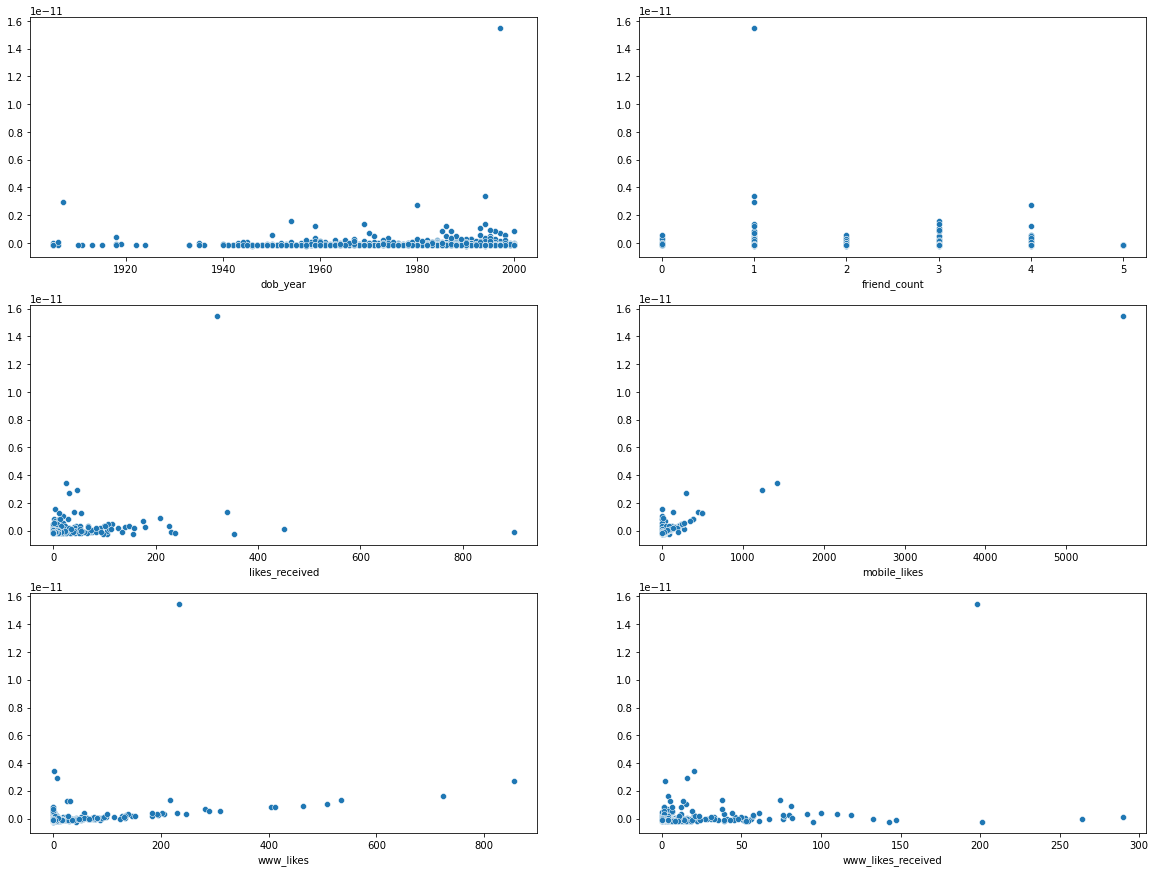

In [58]:
# Creating subplots of scatter plots

fig,ax = plt.subplots(nrows = 3,ncols=2,figsize=(20,15))

for variable,subplot in zip(X_train_rfe.columns[1:],ax.flatten()):
    sns.scatterplot(X_train_rfe[variable],rfe_feature_model.resid,ax=subplot)
    
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

### 2. Homoscedasticity (equal variance) of residuals

In [59]:
# Ho : There is HomoScedasticity present in the data
#H1 : There is HeteroSeadasticity  present in the data

In [64]:
import  statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [65]:
name =['f-value','p-value']

test = sms.het_breuschpagan(rfe_feature_model.resid,rfe_feature_model.model.exog)

lzip(name,test[2:])

[('f-value', 1990.1859233108153), ('p-value', 0.0)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 3. Normality of residuals

In [66]:
from statsmodels.graphics.gofplots import qqplot

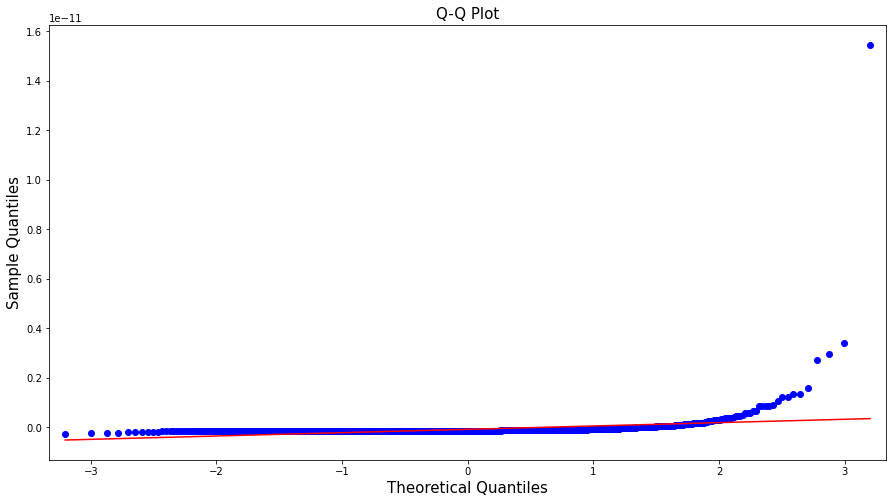

In [68]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(rfe_feature_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

### 4. Identifying Outliers/influential Cases

In [73]:
X_train_rfe.columns

Index(['const', 'dob_year', 'friend_count', 'likes_received', 'mobile_likes',
       'www_likes', 'www_likes_received'],
      dtype='object')

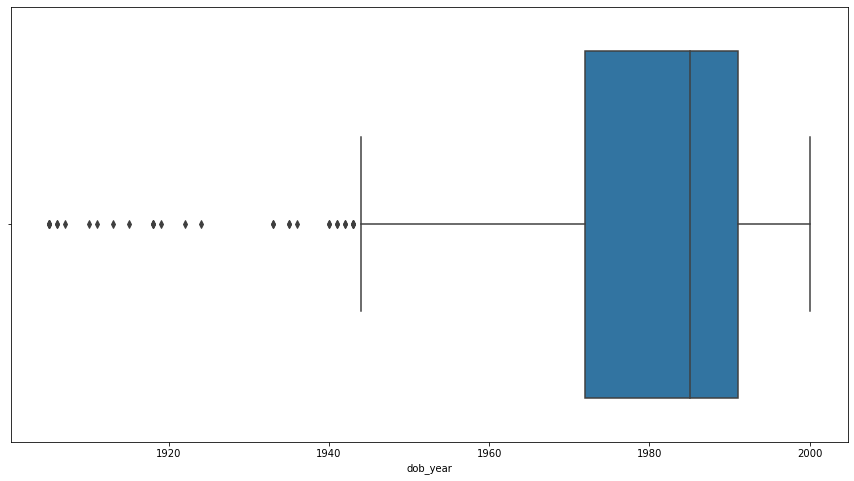

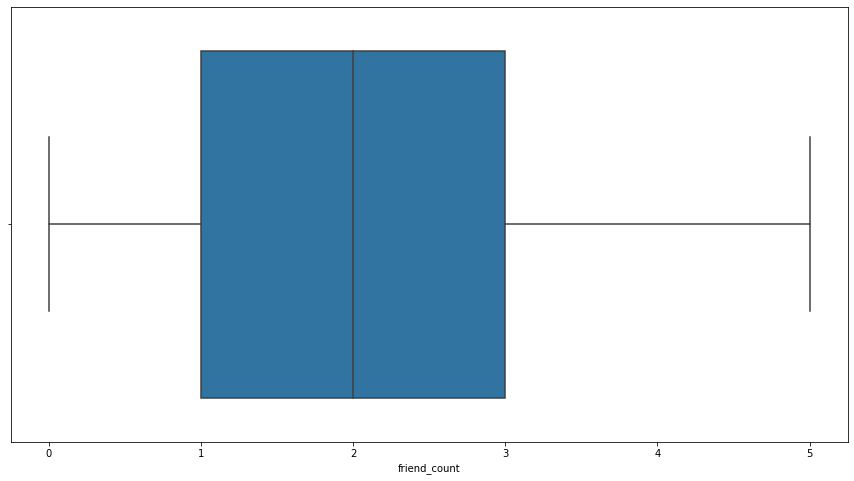

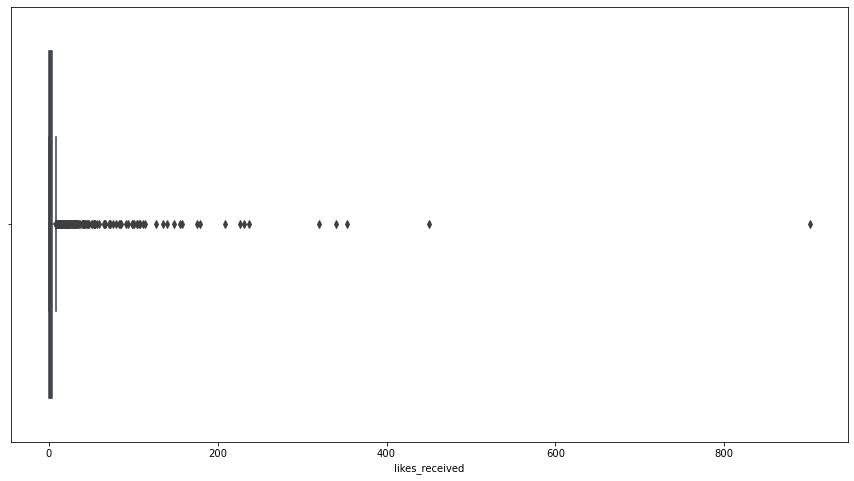

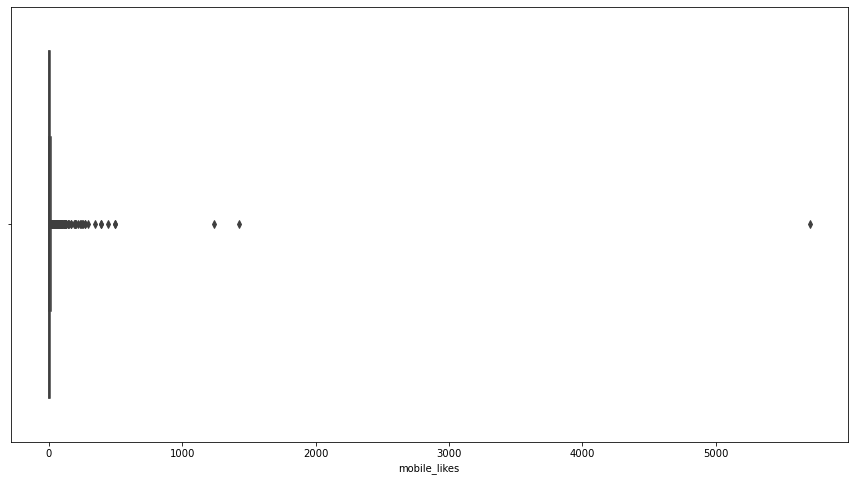

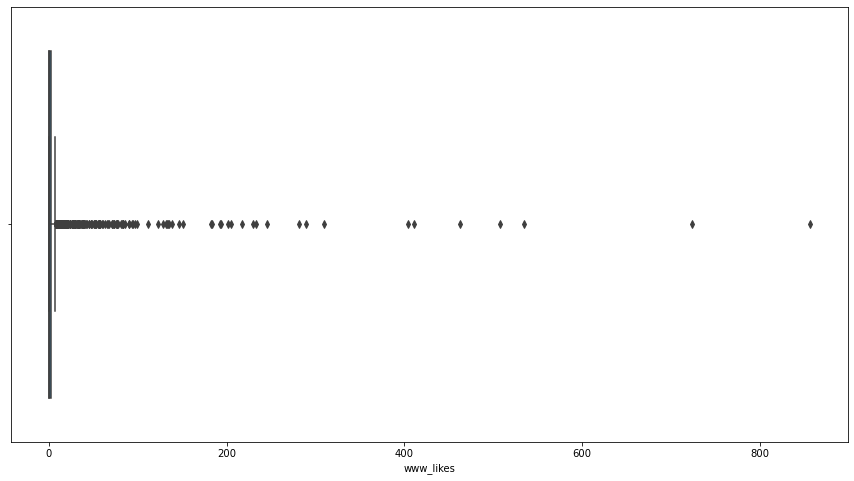

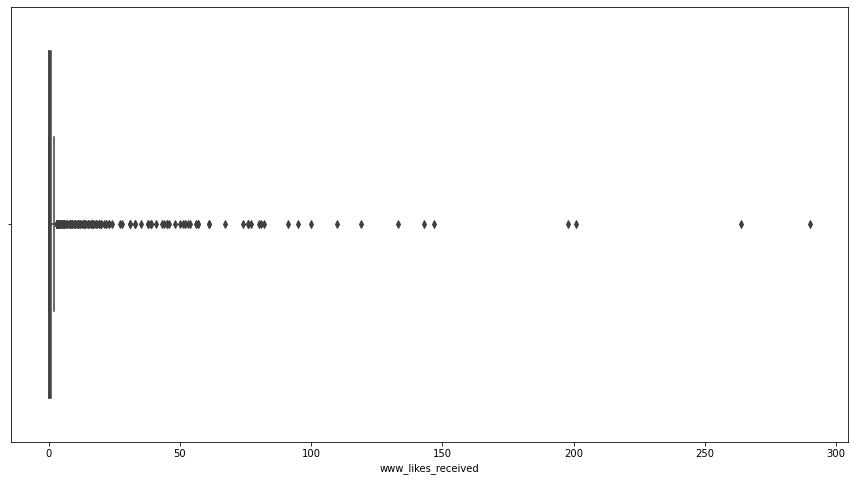

In [76]:
for col in X_train_rfe.columns:
    if(col!='const'):
        sns.boxplot(X_train_rfe[col])
        plt.show()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [77]:
# A) Same has been done in Subdivision 4

### B. K-Fold Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train_rfe, 
                         y = y_train_rfe, 
                         cv = 5, 
                         scoring = 'r2')
scores

array([1., 1., 1., 1., 1.])